Weighted Pre-Treatment Speed: 28.78 mph
Weighted Post-Treatment Speed: 18.14 mph
T-Statistic: 49.159, P-Value: 0.000


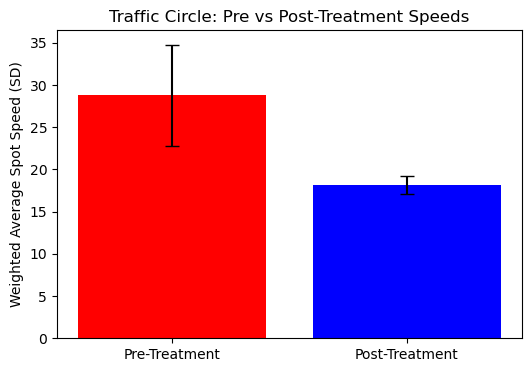

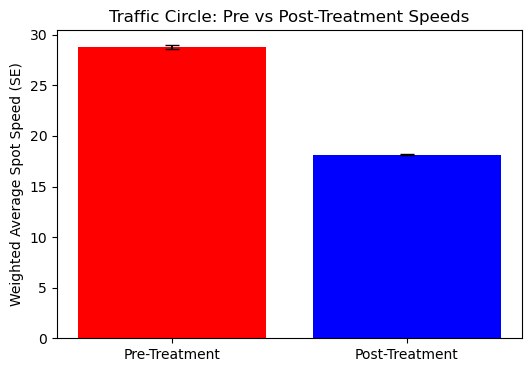

Highest value for pre-treatment'85th Speed Percentile': 42.0 mph Highest value for post-treatment'85th Speed Percentile': 30.0 mph
Row details:
Data Periods                                          Jan 01, 2022 - Dec 31, 2022
Mode of Travel                             All Vehicles - StL All Vehicles Volume
Zone ID                                                                       NaN
Zone Name                                                     South Hoover Street
Zone Is Pass-Through                                                          yes
Zone Direction (degrees)                                                      180
Zone is Bi-Direction                                                          yes
Year-Month                                                                2022-02
Day Type                                                       2: Tuesday (Tu-Tu)
Day Part                                                   1: Early AM (12am-6am)
Average Daily Spot Traffic (StL Volu

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,85th Speed Percentile,95th Speed Percentile
877,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street (1),yes,180,yes,2022-07,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),267,34,34.872,0.980,21.0,41.0,49.0
637,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street (1),yes,180,yes,2022-02,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),275,34,35.777,0.961,18.0,42.0,48.0
301,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street,yes,180,yes,2022-07,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),268,34,34.167,0.990,21.0,41.0,48.0
781,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street (1),yes,180,yes,2022-05,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),280,34,35.921,0.951,21.0,42.0,47.0
43,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street,yes,180,yes,2022-01,7: Sunday (Su-Su),1: Early AM (12am-6am),199,33,34.507,0.945,20.0,39.0,47.0
61,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street,yes,180,yes,2022-02,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),290,33,35.459,0.941,18.0,42.0,47.0
649,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street (1),yes,180,yes,2022-02,4: Thursday (Th-Th),1: Early AM (12am-6am),316,35,35.777,0.964,20.0,42.0,46.0
205,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street,yes,180,yes,2022-05,2: Tuesday (Tu-Tu),1: Early AM (12am-6am),294,34,35.241,0.953,21.0,41.0,46.0
775,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street (1),yes,180,yes,2022-05,1: Monday (M-M),1: Early AM (12am-6am),340,34,35.921,0.957,22.0,41.0,46.0
799,"Jan 01, 2022 - Dec 31, 2022",All Vehicles - StL All Vehicles Volume,NaN,South Hoover Street (1),yes,180,yes,2022-05,5: Friday (F-F),1: Early AM (12am-6am),295,34,35.921,0.941,21.0,40.0,46.0


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Hoover_pre.csv')
post_treatment = pd.read_csv('data/Hoover_post.csv')

pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

def filter_outliers(df, column, threshold=3):
    valid_values = df[column].dropna()
    z_scores = stats.zscore(valid_values)
    valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    return df.loc[valid_indices]



pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

In [2]:
results = {
    'Intersection': 'Hoover & 110th Pl',
  'Pre_Mean': pre_weighted_speed,
    'Post_Mean': post_weighted_speed,
    'Pre_Std': pre_weighted_std,
    'Post_Std': post_weighted_std,
    'Pre_SE': pre_weighted_se,
    'Post_SE': post_weighted_se,
    'Pre_85th': pre_weighted_85th_speed,
    'Post_85th': post_weighted_85th_speed,
    'Pre_95th': pre_weighted_95th_speed,
    'Post_95th': post_weighted_95th_speed,
    'Pre_Max_85th': max_85th_speed_value_pre,
    'Post_Max_85th': max_85th_speed_value_post,
}

import json
with open('../results/Hoover & 110th Pl_summary.json', 'w') as f:
    json.dump(results, f)

NameError: name 'pre_weighted_85th_speed' is not defined